## Leetcode

2709. Greatest Common Divisor Traversal

https://leetcode.com/problems/greatest-common-divisor-traversal/description/

**Description**

    You are given a 0-indexed integer array nums, and you are allowed to traverse between its indices. You can traverse between index i and index j, i != j, if and only if gcd(nums[i], nums[j]) > 1, where gcd is the greatest common divisor.

    Your task is to determine if for every pair of indices i and j in nums, where i < j, there exists a sequence of traversals that can take us from i to j.

    Return true if it is possible to traverse between all such pairs of indices, or false otherwise.

 

    Example 1:
    Input: nums = [2,3,6]
    Output: true
    Explanation: In this example, there are 3 possible pairs of indices: (0, 1), (0, 2), and (1, 2).
    To go from index 0 to index 1, we can use the sequence of traversals 0 -> 2 -> 1, where we move from index 0 to index 2 because gcd(nums[0], nums[2]) = gcd(2, 6) = 2 > 1, and then move from index 2 to index 1 because gcd(nums[2], nums[1]) = gcd(6, 3) = 3 > 1.
    To go from index 0 to index 2, we can just go directly because gcd(nums[0], nums[2]) = gcd(2, 6) = 2 > 1. Likewise, to go from index 1 to index 2, we can just go directly because gcd(nums[1], nums[2]) = gcd(3, 6) = 3 > 1.
    
    Example 2:
    Input: nums = [3,9,5]
    Output: false
    Explanation: No sequence of traversals can take us from index 0 to index 2 in this example. So, we return false.

    Example 3:
    Input: nums = [4,3,12,8]
    Output: true
    Explanation: There are 6 possible pairs of indices to traverse between: (0, 1), (0, 2), (0, 3), (1, 2), (1, 3), and (2, 3). A valid sequence of traversals exists for each pair, so we return true.
    

**Constraints**

    1 <= nums.length <= 10^5
    1 <= nums[i] <= 10^5

In [2]:
from typing import List

In [3]:
class Solution:
    def canTraverseAllPairs(self, nums: List[int]) -> bool:
        def find_set_leader(disjoint_set, x):
            if disjoint_set[x] == x:
                return x
            disjoint_set[x] = find_set_leader(disjoint_set, disjoint_set[x])
            return disjoint_set[x]

        def union_sets(disjoint_set, set_size, x, y):
            x_leader = find_set_leader(disjoint_set, x)
            y_leader = find_set_leader(disjoint_set, y)
            if x_leader == y_leader:
                return
            if set_size[x_leader] < set_size[y_leader]:
                disjoint_set[x_leader] = y_leader
                set_size[y_leader] += set_size[x_leader]
            else:
                disjoint_set[y_leader] = x_leader
                set_size[x_leader] += set_size[y_leader]

        num_elements = len(nums)
        if num_elements == 1:
            return True

        disjoint_set = [i for i in range(num_elements)]
        set_size = [1] * num_elements
        factor_first_occurrence = {}

        for i, num in enumerate(nums):
            divisor = 2
            while divisor * divisor <= num:
                if num % divisor == 0:
                    if divisor in factor_first_occurrence:
                        union_sets(disjoint_set, set_size, i, factor_first_occurrence[divisor])
                    else:
                        factor_first_occurrence[divisor] = i
                    while num % divisor == 0:
                        num //= divisor
                divisor += 1
            if num > 1:
                if num in factor_first_occurrence:
                    union_sets(disjoint_set, set_size, i, factor_first_occurrence[num])
                else:
                    factor_first_occurrence[num] = i

        return set_size[find_set_leader(disjoint_set, 0)] == num_elements
        

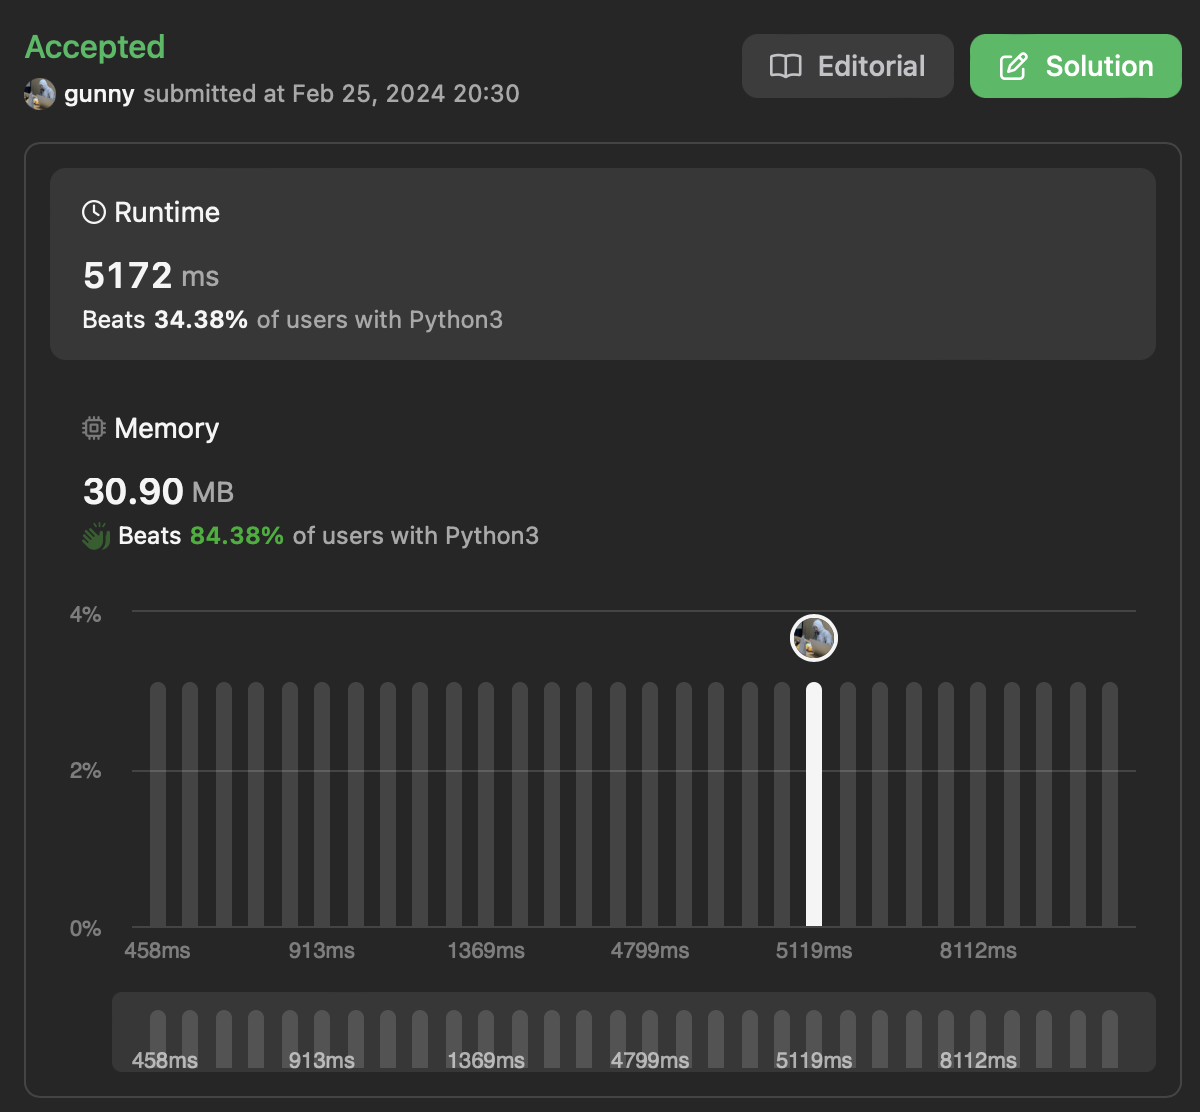